In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/train.csv')
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2022/test.csv')

In [3]:
train_df.head(10)

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
5,5,2015-01-01,Finland,KaggleRama,Kaggle Sticker,283
6,6,2015-01-01,Norway,KaggleMart,Kaggle Mug,526
7,7,2015-01-01,Norway,KaggleMart,Kaggle Hat,906
8,8,2015-01-01,Norway,KaggleMart,Kaggle Sticker,250
9,9,2015-01-01,Norway,KaggleRama,Kaggle Mug,1005


In [4]:
train_df.shape

(26298, 6)

In [5]:
train_df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [6]:
train_df['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [7]:
train_df['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [8]:
train_df['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

In [9]:
train_df = train_df.set_index('row_id')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      26298 non-null  object
 1   country   26298 non-null  object
 2   store     26298 non-null  object
 3   product   26298 non-null  object
 4   num_sold  26298 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [11]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ MB


In [13]:
train_df.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [14]:
train_df['month'] = train_df['date'].dt.month

In [15]:
train_df['day_of_week'] = train_df['date'].dt.dayofweek

In [16]:
train_df.head()

,date,country,store,product,num_sold,month,day_of_week
row_id,,,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1,3
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1,3
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1,3
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1,3
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1,3


<AxesSubplot:xlabel='store', ylabel='num_sold'>

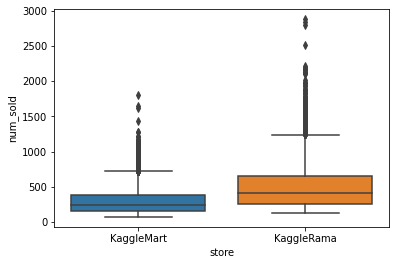

In [17]:
sns.boxplot(data=train_df,x='store',y='num_sold')

<AxesSubplot:xlabel='product', ylabel='num_sold'>

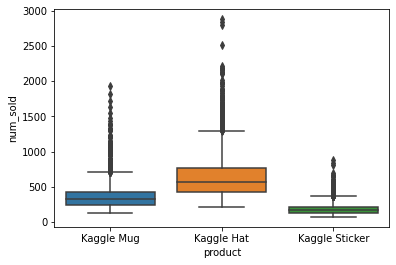

In [18]:
sns.boxplot(data=train_df,x='product',y='num_sold')

<AxesSubplot:xlabel='product', ylabel='num_sold'>

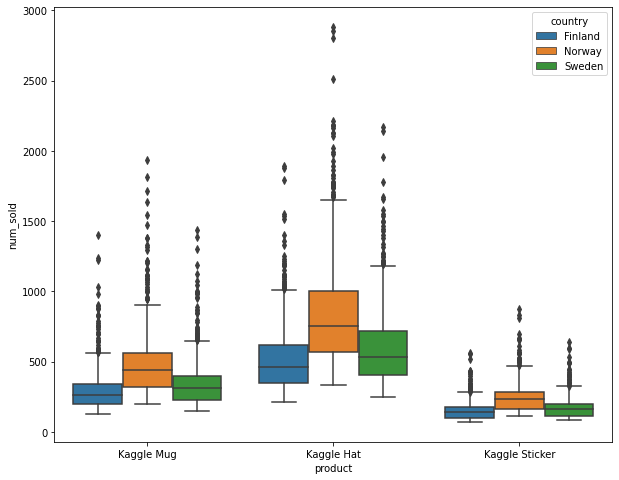

In [19]:
plt.figure( figsize= (10,8))
sns.boxplot(data=train_df,x='product',y='num_sold',hue='country')

Norway seems to be leading in sales

<AxesSubplot:ylabel='month'>

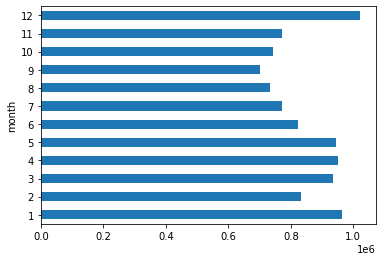

In [20]:
train_df.groupby('month')['num_sold'].sum().plot(kind='barh')

<AxesSubplot:ylabel='day_of_week'>

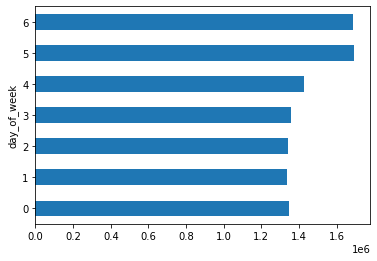

In [21]:
train_df.groupby('day_of_week')['num_sold'].sum().plot(kind='barh')

In [22]:
## Dropping the date column as important month and day features extracted
train_df = train_df.drop('date',axis=1)

In [23]:
train_df.head()

,country,store,product,num_sold,month,day_of_week
row_id,,,,,,
0,Finland,KaggleMart,Kaggle Mug,329,1,3
1,Finland,KaggleMart,Kaggle Hat,520,1,3
2,Finland,KaggleMart,Kaggle Sticker,146,1,3
3,Finland,KaggleRama,Kaggle Mug,572,1,3
4,Finland,KaggleRama,Kaggle Hat,911,1,3


In [24]:
y= train_df['num_sold']
X= train_df.drop('num_sold',axis=1)

In [25]:
X.head()

,country,store,product,month,day_of_week
row_id,,,,,
0,Finland,KaggleMart,Kaggle Mug,1,3
1,Finland,KaggleMart,Kaggle Hat,1,3
2,Finland,KaggleMart,Kaggle Sticker,1,3
3,Finland,KaggleRama,Kaggle Mug,1,3
4,Finland,KaggleRama,Kaggle Hat,1,3


In [26]:
## one hot encoding of the dataset
category = ['country','store','product']
X = pd.get_dummies(data=X,columns=category,drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_validate,y_train,y_validate = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(21038, 7)
(5260, 7)
(21038,)
(5260,)


In [29]:
X_train.columns

Index(['month', 'day_of_week', 'country_Norway', 'country_Sweden',
       'store_KaggleRama', 'product_Kaggle Mug', 'product_Kaggle Sticker'],
      dtype='object')

In [30]:
## transforming the test data in similer terms
test_df = test_df.set_index('row_id')
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek

In [31]:
test_df.drop('date',axis=1,inplace=True)

In [32]:
category = ['country','store','product']
test_df = pd.get_dummies(data=test_df,columns=category)

In [33]:
test_df.columns

Index(['month', 'day_of_week', 'country_Finland', 'country_Norway',
       'country_Sweden', 'store_KaggleMart', 'store_KaggleRama',
       'product_Kaggle Hat', 'product_Kaggle Mug', 'product_Kaggle Sticker'],
      dtype='object')

In [34]:
## dropping country_Finland,store_KaggleMart,product_Kaggle Hat
test_df.drop(['country_Finland','store_KaggleMart','product_Kaggle Hat'],axis=1,inplace=True)

In [35]:
test_df.columns

Index(['month', 'day_of_week', 'country_Norway', 'country_Sweden',
       'store_KaggleRama', 'product_Kaggle Mug', 'product_Kaggle Sticker'],
      dtype='object')

In [36]:
test_df.shape

(6570, 7)

## Model Building

### 1. Based on Linear Regression -Base model

In [37]:
import statsmodels.api as sm

In [38]:
X_train_c = sm.add_constant(X_train)
model  = sm.OLS(y_train,X_train_c)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     9480.
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:14:09   Log-Likelihood:            -1.3232e+05
No. Observations:               21038   AIC:                         2.646e+05
Df Residuals:                   21030   BIC:                         2.647e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    427.8266      3.089    138.480      0.000     421.771     433.882
month                     -5.9331      0.261    -22.766      0.000      -6.444      -5.422
day_of_week               17.5514      0.451     38.918      0.000      16.667      18.435
country_Norway           196.7556      2.202     89.368      0.000     192.440     201.071
country_Sweden            48.8324      2.201     22.189      0.000      44.519      53.146
store_KaggleRama         209.1642      1.798    116.315      0.000     205.639     212.689
product_Kaggle Mug      -274.5921      2.202   -124.707      0.000    -278.908    -270.276
product_Kaggle Sticker  -448.7043      2.203   -203.680      0.000    -453.022    -444.386
==============================================================================
Omnibus:                    15395.306   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           525285.240
Skew:                           3.148   Prob(JB):                         0.00
Kurtosis:                      26.656   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since probability for all features is less than 0.05 , all features are significant

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame({'cols':X_train.columns,'vif':vifs})
vif_df

,cols,vif
0,month,3.187010
1,day_of_week,2.651406
2,country_Norway,1.748954
3,country_Sweden,1.742598
4,store_KaggleRama,1.836384
5,product_Kaggle Mug,1.744269
6,product_Kaggle Sticker,1.737817


Values are well within range. So no multicollinearity

In [40]:
y_validate_predict = results.predict(sm.add_constant(X_validate))

In [41]:
from sklearn.metrics import r2_score
print('R2 score on validation set is ',r2_score(y_validate,y_validate_predict))
validation_scores = {}
validation_scores['lr'] = r2_score(y_validate,y_validate_predict)

R2 score on validation set is  0.7638380519701511


Considering this Linear Regression one as a base model ,go forward with Other type of models

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_validate,y_validate_predict)
rmse = mse**0.5
print('Root mean squared error is ', rmse)

Root mean squared error is  129.85250557566704


In [43]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [44]:
print(smape(y_validate,y_validate_predict))

32.138028480713906


In [45]:
test_df['pred'] = results.predict(sm.add_constant(test_df))

In [46]:
test_df

,month,day_of_week,country_Norway,country_Sweden,store_KaggleRama,product_Kaggle Mug,product_Kaggle Sticker,pred
row_id,,,,,,,,
26298,1,1,0,0,0,1,0,164.852860
26299,1,1,0,0,0,0,0,439.444929
26300,1,1,0,0,0,0,1,-9.259358
26301,1,1,0,0,1,1,0,374.017058
26302,1,1,0,0,1,0,0,648.609127
...,...,...,...,...,...,...,...,...
32863,12,1,0,1,0,0,0,423.013571
32864,12,1,0,1,0,0,1,-25.690716
32865,12,1,0,1,1,1,0,357.585700


In [47]:
## for rows with negative values , convert to 0
test_df['pred'] = test_df['pred'].apply(lambda x : 0 if x<0 else x)

In [48]:
test_df.reset_index(inplace=True)

In [49]:
test_df.rename(columns={'pred':'num_sold'},inplace=True)

In [50]:
#test_df[['row_id','num_sold']].to_csv('./submission.csv',index=False)

### 2. Decision tree based model

1) Base Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)


In [52]:
dt.fit(X_train,y_train)
y_validate_pred_dt = dt.predict(X_validate)
y_train_pred_dt = dt.predict(X_train)

In [53]:
print('R2 score for Validation set is ',r2_score(y_validate,y_validate_pred_dt))
print('R2 score for Train set is',r2_score(y_train,y_train_pred_dt))

R2 score for Validation set is  0.9030745451552524
R2 score for Train set is 0.9133973031861822


2) Hyper parameter tuning

In [54]:
%%time
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor(random_state=42)
paramgrid = {
    'max_depth':[5,10,15,20],
    'min_samples_split':[20,40,50]
}
grid = GridSearchCV(dt,param_grid=paramgrid,scoring='r2',return_train_score=True,verbose=1,n_jobs=-1)

CPU times: user 85 µs, sys: 0 ns, total: 85 µs
Wall time: 89.9 µs


In [55]:
%%time
grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 492 ms, sys: 225 ms, total: 717 ms
Wall time: 3.45 s


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [20, 40, 50]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
grid.best_params_

{'max_depth': 20, 'min_samples_split': 50}

In [57]:
grid.best_score_

0.9042753388126311

In [58]:
dt_model = grid.best_estimator_

In [59]:
y_validate_pred = dt_model.predict(X_validate)
smape(y_validate,y_validate_pred)

10.212377606353552

In [60]:
test_df['dt_pred'] = dt_model.predict(test_df[['month', 'day_of_week', 'country_Norway', 'country_Sweden',
       'store_KaggleRama', 'product_Kaggle Mug', 'product_Kaggle Sticker']])

In [61]:
test_df.rename(columns={'num_sold':'lr_pred'},inplace=True)

In [62]:
#test_df[['row_id','dt_pred']].rename(columns={'dt_pred':'num_sold'}).to_csv('./submission.csv',index=False)

### 3. Ensemble Training - Random Forest

1.) Base Model

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf_base = RandomForestRegressor(random_state=42)

In [65]:
rf_base.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [66]:
y_validate_rfbase_pred = rf_base.predict(X_validate)

In [67]:
print('Base RF model r2score is ',r2_score(y_validate,y_validate_rfbase_pred))

Base RF model r2score is  0.9032148134583188


2.) Hyperparameter Tuning

In [68]:
paramgrid={
    'max_depth':[5,10,15,20],
    'min_samples_split':[20,40,50],
    'n_estimators':[20,30,40],
    'max_features':[3,4,5]
}

In [69]:
rf = RandomForestRegressor(random_state=42)

In [70]:
grid = GridSearchCV(rf,param_grid=paramgrid,n_jobs=-1,verbose=1,scoring='r2')

In [71]:
%%time
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   54.4s finished


CPU times: user 3.99 s, sys: 1.3 s, total: 5.28 s
Wall time: 54.9 s


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [3, 4, 5],
                         'min_samples_split': [20, 40, 50],
                         'n_estimators': [20, 30, 40]},
             scoring='r2', verbose=1)

In [72]:
## params of optimised model
grid.best_params_

{'max_depth': 20,
 'max_features': 5,
 'min_samples_split': 50,
 'n_estimators': 40}

In [73]:
rf_optimum = grid.best_estimator_

In [74]:
y_validate_rfopt_pred = rf_optimum.predict(X_validate)

In [75]:
print('Optimized RF model r2score is ',r2_score(y_validate,y_validate_rfopt_pred))

Optimized RF model r2score is  0.9110429104505293


In [76]:
## use the optimized model for prediction on test_df
test_df['rf_pred'] = rf_optimum.predict(test_df[['month', 'day_of_week', 'country_Norway', 'country_Sweden',
       'store_KaggleRama', 'product_Kaggle Mug', 'product_Kaggle Sticker']])

In [77]:
## correct negative values to 0
test_df['rf_pred'] = test_df['rf_pred'].apply(lambda x: 0 if x<0 else x)

In [78]:
test_df[['row_id','rf_pred']].rename(columns={'rf_pred':'num_sold'}).to_csv('./submission.csv',index=False)